In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [3]:
# Data Load
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [4]:
data, target = housing["data"], housing["target"]

In [5]:
# Data EDA
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
pd.Series(target).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

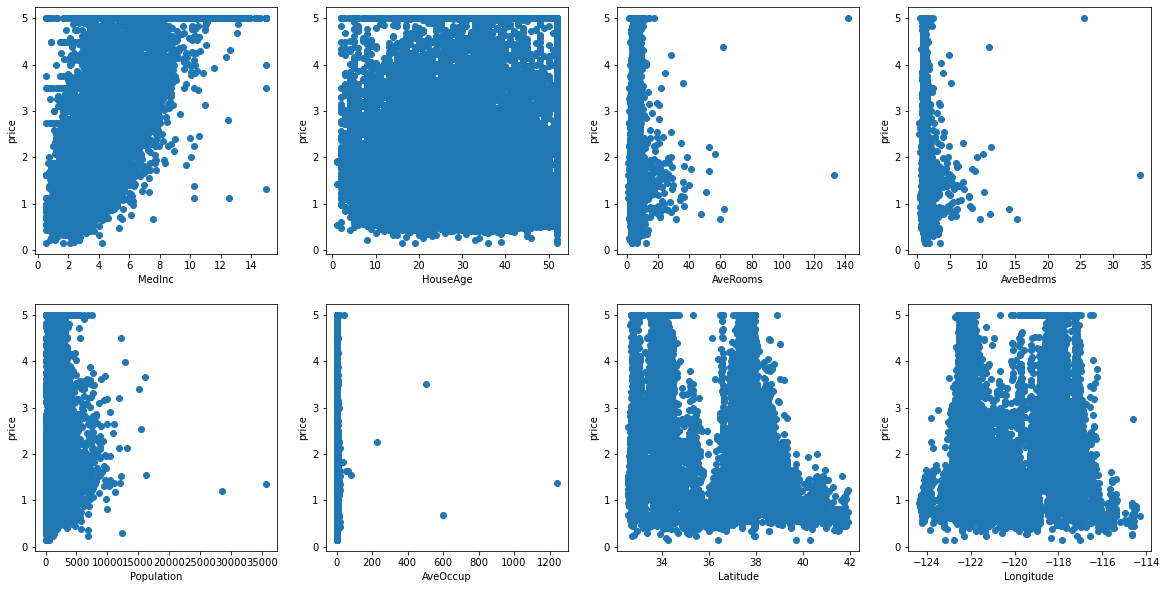

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 4, i % 4]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

In [8]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [11]:
!pip install xgboost

In [12]:
# XGBoost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

In [13]:
# 학습
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
# 예측
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

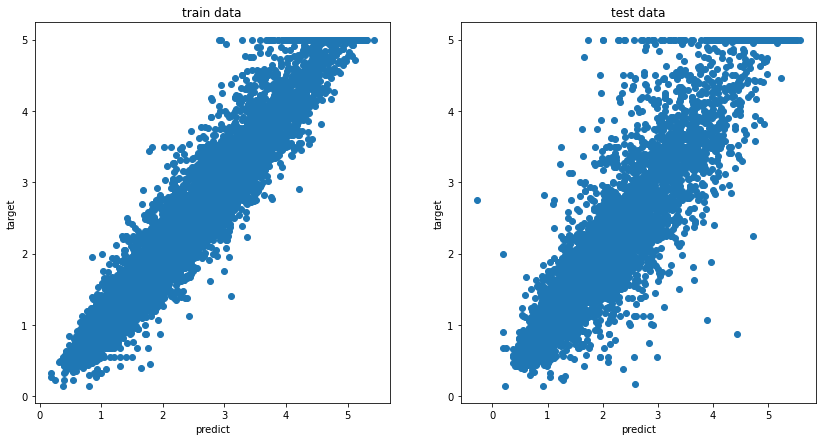

In [15]:
# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

In [16]:
# 평가
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [17]:
print(f"XGBoost Train MSE is {xgb_train_mse:.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")

XGBoost Train MSE is 0.0697
XGBoost Test MSE is 0.2209


In [19]:
!pip install lightgbm

In [20]:
# Light GBM
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

In [21]:
# 학습
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

In [22]:
# 예측
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

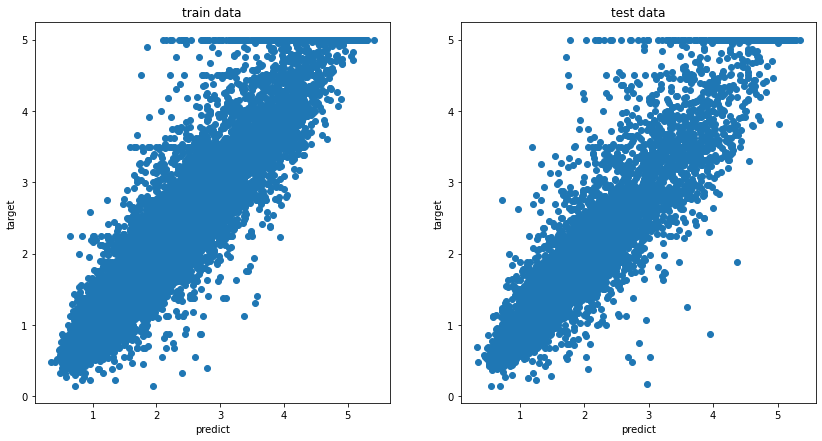

In [23]:
# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

In [24]:
# 평가
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

In [25]:
print(f"Light Boost Train MSE is {lgb_train_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")

Light Boost Train MSE is 0.1543
Light Boost Test MSE is 0.2098


In [34]:
!pip install catboost

In [35]:
# CatBoost
import catboost as cb

cb_reg = cb.CatBoostRegressor()

In [36]:
# 학습
cb_reg.fit(train_data, train_target, verbose=False) # 학습 과정 생략을 위해 verbose=False

In [37]:
# 예측
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

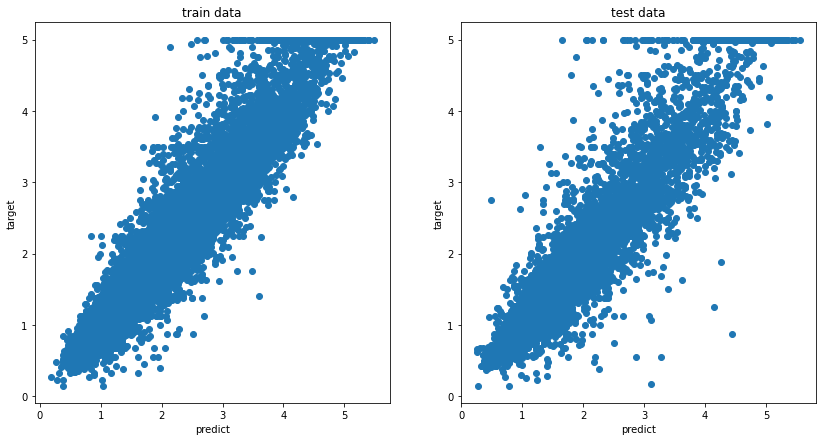

In [38]:
# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

In [39]:
# 평가
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

In [40]:
print(f"Cat Boost Train MSE is {cb_train_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

Cat Boost Train MSE is 0.1163
Cat Boost Test MSE is 0.1938


In [41]:
# 비교
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

XGBoost Test MSE is 0.2209
Light Boost Test MSE is 0.2098
Cat Boost Test MSE is 0.1938
